# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
from matplotlib.widgets import Button, Slider, RadioButtons

<IPython.core.display.Javascript object>


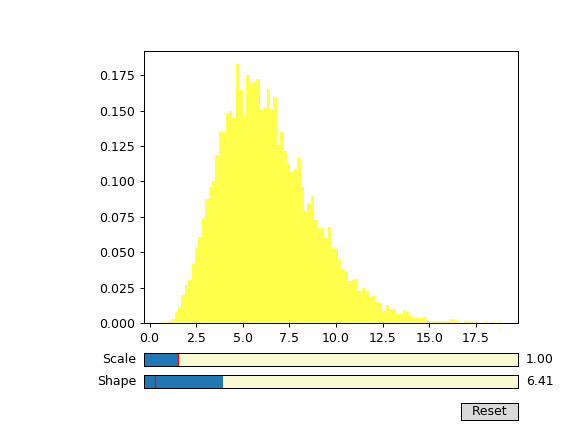

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [96]:
axis_color = 'lightgoldenrodyellow'
fig = plt.figure()
ax = plt.subplot(111)
fig.subplots_adjust(left=0.25, bottom=0.25)

shape_0 = 1
scale_0 = 1
def draw_gamma(ax, shape, scale):
    line = ax.hist(np.random.gamma(shape, scale, 10000), 100, normed=True, color="yellow", alpha=0.7)
# Add two sliders for tweaking the parameters
draw_gamma(ax, shape_0, scale_0)
# Define an axes area and draw a slider in it
scale_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], axisbg=axis_color)
scale_slider = Slider(scale_slider_ax, 'Scale', 0.1, 10.0, valinit=scale_0)

# Draw another slider
shape_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], axisbg=axis_color)
shape_slider = Slider(shape_slider_ax, 'Shape', 0.1, 30.0, valinit=shape_0)

# Define an action for modifying the line when any slider's value changes
def sliders_on_changed(val):
    ax.cla()
    reset_button.label.set_label('Reset')
    draw_gamma(ax, shape_slider.val, scale_slider.val)
    fig.canvas.draw_idle()
shape_slider.on_changed(sliders_on_changed)
scale_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset'
#                       , color=axis_color, hovercolor='0.975'
                     )
def reset_button_on_clicked(mouse_event):
    shape_slider.reset()
    scale_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

plt.show()

In [95]:
fig.canvas.draw_idle?

